#**Analysis of the Dataset(s) Electrical Grid Stability Simulated Data Set**


## 1. Provide an overview of the Dataset including the Dataset Characteristics and Exploratory Data Analysis, Data Preprocessing, and performance of different models.

Electrical Grid Stability Simulated Data Set contains 10000 rows and 14 columns. Tthe 1st four columns represents the value of electricity producer.4th, 5th and 6th columns represents the consumption of nominal power. Then the next four columns represents the coefficient (gamma) proportional to price elasticity. The 13th column represents the maximal real part of the characteristic equation root and the lat column represents  the stability label of the system. This dataset contains information electrical grid stability and whether the system is stable or not. It's a classification problem where the goal is to predict the stability of the electrical grid.

Exploratory Data Analysis (EDA) is an important first step in any data analysis to understand the distribution, range and any anomalies in the data. We use pandas and seaborn libraries in Python to explore the data. In EDA, we analyze the data by plotting charts, graphs, and tables to reveal insights and patterns. With This dataset, we perform EDA by checking for missing values, analyzing the distribution of categorical and numerical variables, understanding the stability of different grid system, and visualizing the correlation between variables.

Data preprocessing is the process of cleaning and transforming the raw data into a format that machine learning models can understand. We use different techniques to preprocess the This Electrical Grid Stability dataset. As there is no missing value,we do not need to handle missing values. But some other preprocessing steps which we used in this dataset are - converting categorical variables into numerical variables, converting data type,normalizing the data,label encoding and splitting the dataset into training and test sets.

After preprocessing, we apply various classification algorithms to build ML models, such as logistic regression,svc and decision trees. Then we fine-tune the model parameters and use cross-validation for performance evaluation.We also apply classifier algorithm to build ML models.
As this is a classification problem the classification algorithm's performance is more better than regressor algorithm.

## 2.	Dataset Characteristics and Exploratory Data Analysis

In this section, introduce your dataset. Mention number of rows, columns and other characteristics. Provide the histograms of data distribution and correlations among the variable with a suitable discussion. Try to stand out and be creative. (Add as many cells as you need)

### 2.1 Load, View Data and Show Analysis on Rows and Columns

In [ ]:
# Code Here (Add as many cells as you need)
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="darkgrid")
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from scipy import stats

In [ ]:
smart_grid = pd.read_csv("/content/drive/MyDrive/Data_for_UCI_named.csv")

smart_grid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,2.959060,3.079885,8.381025,9.780754,3.763085,-0.782604,-1.257395,-1.723086,0.650456,0.859578,0.887445,0.958034,0.055347,unstable
1,9.304097,4.902524,3.047541,1.369357,5.067812,-1.940058,-1.872742,-1.255012,0.413441,0.862414,0.562139,0.781760,-0.005957,stable
2,8.971707,8.848428,3.046479,1.214518,3.405158,-1.207456,-1.277210,-0.920492,0.163041,0.766689,0.839444,0.109853,0.003471,unstable
3,0.716415,7.669600,4.486641,2.340563,3.963791,-1.027473,-1.938944,-0.997374,0.446209,0.976744,0.929381,0.362718,0.028871,unstable
4,3.134112,7.608772,4.943759,9.857573,3.525811,-1.125531,-1.845975,-0.554305,0.797110,0.455450,0.656947,0.820923,0.049860,unstable


In [ ]:
cl_name = smart_grid.columns.values
print(cl_name)

['tau1' 'tau2' 'tau3' 'tau4' 'p1' 'p2' 'p3' 'p4' 'g1' 'g2' 'g3' 'g4'
 'stab' 'stabf']


In [ ]:
smart_grid.info()
smart_grid.dtypes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


tau1     float64
tau2     float64
tau3     float64
tau4     float64
p1       float64
p2       float64
p3       float64
p4       float64
g1       float64
g2       float64
g3       float64
g4       float64
stab     float64
stabf     object
dtype: object

In [ ]:
print("number of rows : ", smart_grid.shape[0])
print("number of columns : ",smart_grid.shape[1])

number of rows :  10000
number of columns :  14


### 2.2 Data Cleaning









#### Identifying duplicate values


In [ ]:
# Code Here (Add as many cells as you need)
smart_grid.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
9995    False
9996    False
9997    False
9998    False
9999    False
Length: 10000, dtype: bool

#### Identifying missing values


In [ ]:
# Code Here (Add as many cells as you need)
smart_grid.isnull().sum()

tau1     0
tau2     0
tau3     0
tau4     0
p1       0
p2       0
p3       0
p4       0
g1       0
g2       0
g3       0
g4       0
stab     0
stabf    0
dtype: int64

#### Visualisation of missing data


In [ ]:
# Code Here (Add as many cells as you need)
smart_grid.isnull()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9996,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9997,False,False,False,False,False,False,False,False,False,False,False,False,False,False
9998,False,False,False,False,False,False,False,False,False,False,False,False,False,False


<Axes: >

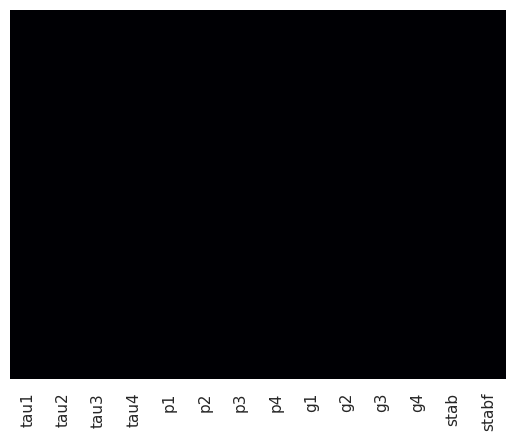

In [ ]:
sns.heatmap(smart_grid.isnull(),yticklabels=False,cbar=False,cmap='inferno')

#### Dealing with missing values (How would you deal with missing values?) (Columns with missing data)



1.   Do analysis using plots

2.   Provide an appropriate discussion




In [ ]:
# Code Here (Add as many cells as you need)
import missingno as msno
smart_grid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   p1      10000 non-null  float64
 5   p2      10000 non-null  float64
 6   p3      10000 non-null  float64
 7   p4      10000 non-null  float64
 8   g1      10000 non-null  float64
 9   g2      10000 non-null  float64
 10  g3      10000 non-null  float64
 11  g4      10000 non-null  float64
 12  stab    10000 non-null  float64
 13  stabf   10000 non-null  object 
dtypes: float64(13), object(1)
memory usage: 1.1+ MB


<Axes: >

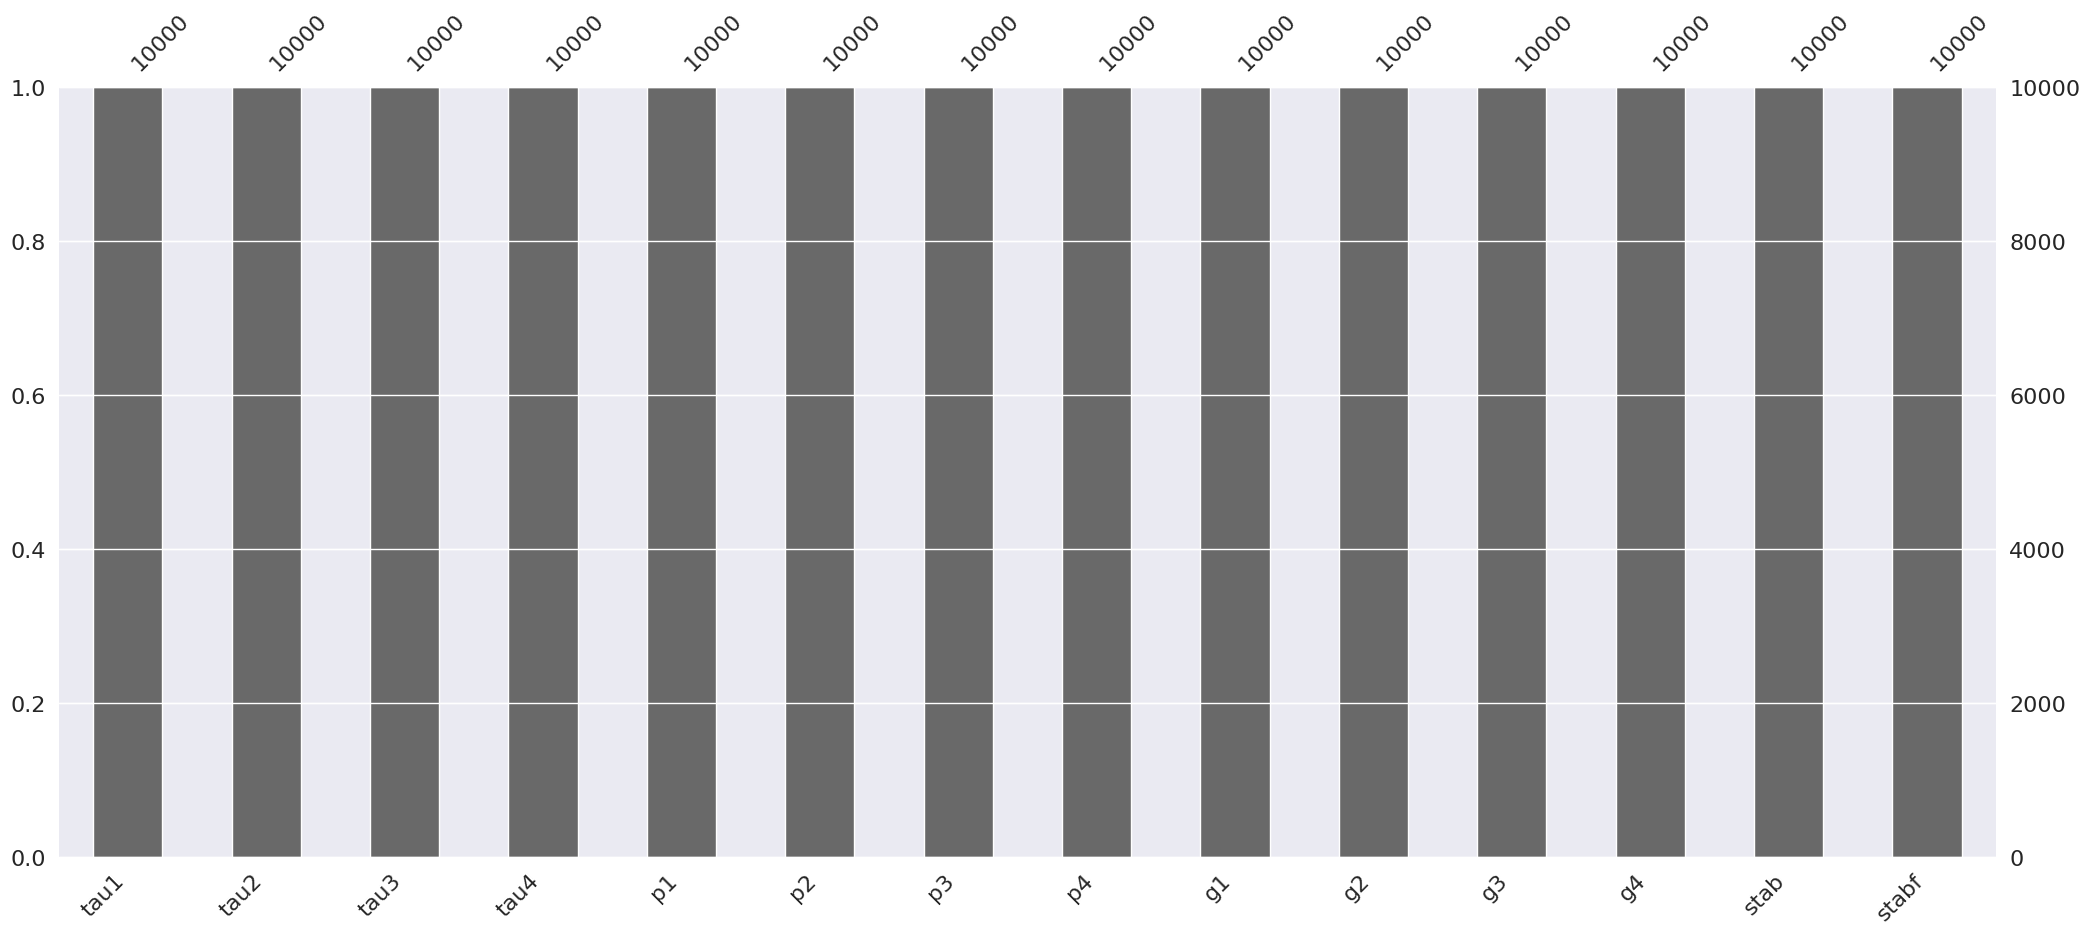

In [ ]:
msno.bar(smart_grid)

<Axes: >

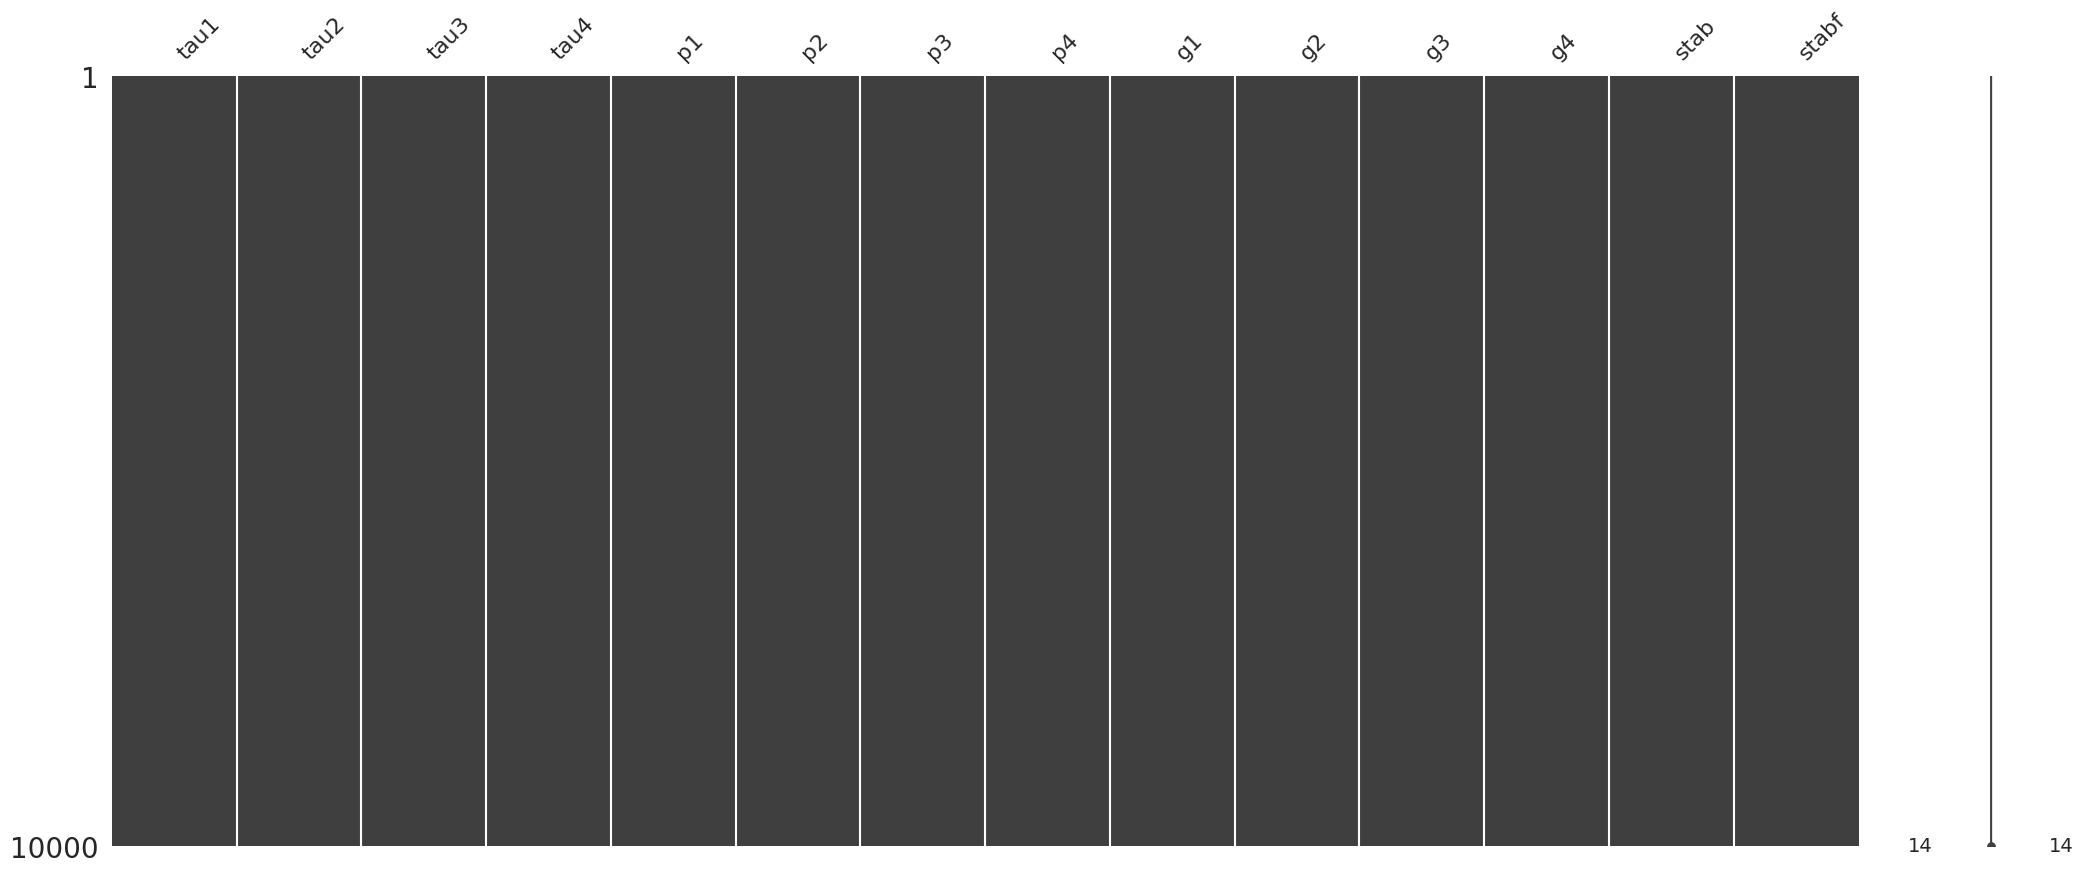

In [ ]:
msno.matrix(smart_grid)

As there is no column with missing data, we have nothing to fix in this section.

### 2.3 Analysing Patterns using Visualisations

#### Visualization of column correlation. Also, plot Heat Map

In [ ]:
# Code Here (Add as many cells as you need)
correlation = smart_grid.corr()
correlation

<ipython-input-18-c18d3f2cdffa>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = smart_grid.corr()


,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab
tau1,1.000000,0.015586,-0.005970,-0.017265,0.027183,-0.015485,-0.015924,-0.015807,0.010521,0.015350,-0.001279,0.005494,0.275761
tau2,0.015586,1.000000,0.014273,-0.001965,-0.004769,0.006573,0.007673,-0.005963,-0.001742,0.015383,0.016508,-0.011764,0.290975
tau3,-0.005970,0.014273,1.000000,0.004354,0.016953,-0.003134,-0.008780,-0.017531,-0.011605,0.007671,0.014702,-0.011497,0.280700
tau4,-0.017265,-0.001965,0.004354,1.000000,-0.003173,0.010553,0.006169,-0.011211,-0.004149,0.008431,0.003260,-0.000491,0.278576
p1,0.027183,-0.004769,0.016953,-0.003173,1.000000,-0.573157,-0.584554,-0.579239,0.000721,0.015405,0.001069,-0.015451,0.010278
p2,-0.015485,0.006573,-0.003134,0.010553,-0.573157,1.000000,0.002388,-0.006844,0.015603,-0.018032,0.007555,0.019817,0.006255
p3,-0.015924,0.007673,-0.008780,0.006169,-0.584554,0.002388,1.000000,0.012953,-0.003219,-0.011575,-0.005897,-0.010485,-0.003321
p4,-0.015807,-0.005963,-0.017531,-0.011211,-0.579239,-0.006844,0.012953,1.000000,-0.013636,0.002850,-0.003515,0.017505,-0.020786
g1,0.010521,-0.001742,-0.011605,-0.004149,0.000721,0.015603,-0.003219,-0.013636,1.000000,0.007559,-0.005836,0.012431,0.282774
g2,0.015350,0.015383,0.007671,0.008431,0.015405,-0.018032,-0.011575,0.002850,0.007559,1.000000,-0.012809,-0.014909,0.293601


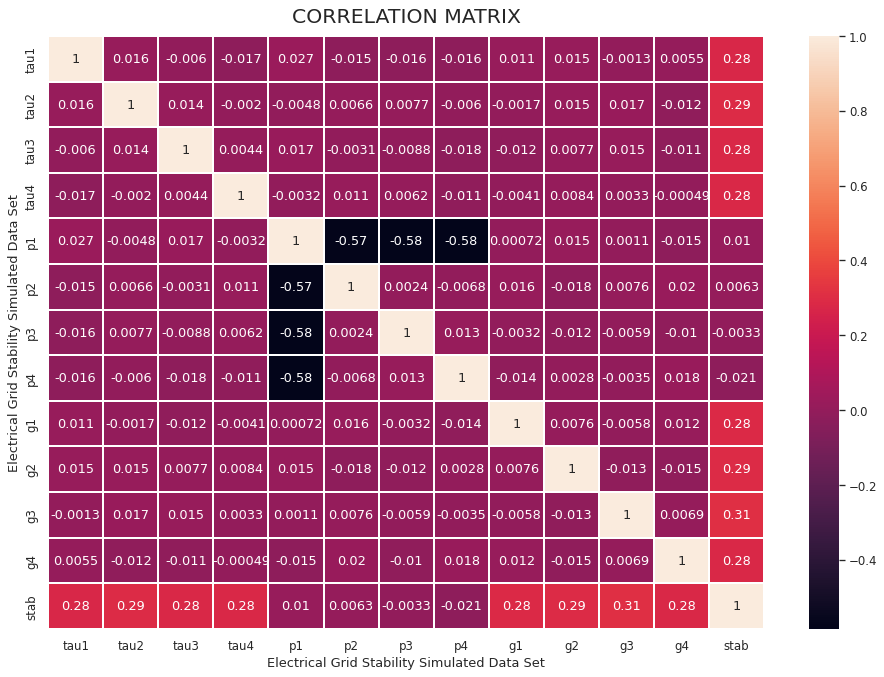

In [ ]:
plt.figure(figsize=(15,10), dpi=77)
sns.heatmap(correlation, linecolor='white',linewidths=0.1, annot=True)
plt.title('Correlation Matrix'.upper(), size=19, pad=13)
plt.xlabel('Electrical Grid Stability Simulated Data Set')
plt.ylabel('Electrical Grid Stability Simulated Data Set')
plt.show()

#### Visualization of Linear Relationships of columns (Continuous Numerical Variables)

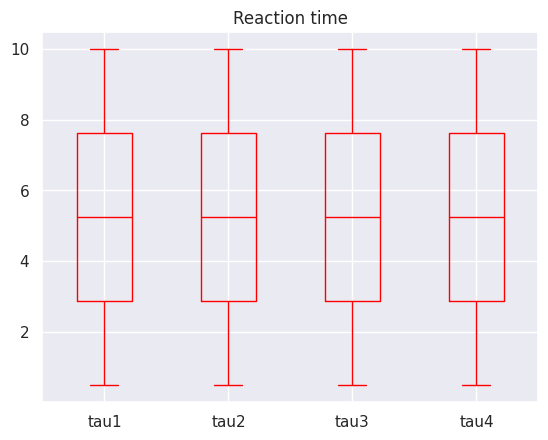

In [ ]:
for axs_ind, feature_group in enumerate(["tau"]):
    smart_grid.boxplot(column=[feature_group + str(i + 1) for i in range(4)], color="red")

plt.title("Reaction time")
plt.show()

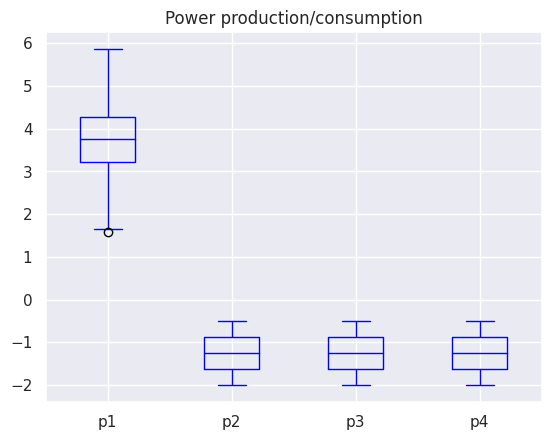

In [ ]:
for axs_ind, feature_group in enumerate(["p"]):
    smart_grid.boxplot(column=[feature_group + str(i + 1) for i in range(4)], color="blue")

plt.title("Power production/consumption")
plt.show()

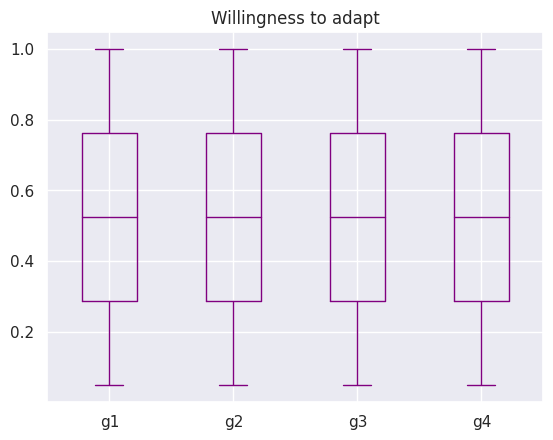

In [ ]:
for axs_ind, feature_group in enumerate(["g"]):
    smart_grid.boxplot(column=[feature_group + str(i + 1) for i in range(4)], color="purple")

plt.title("Willingness to adapt")
plt.show()

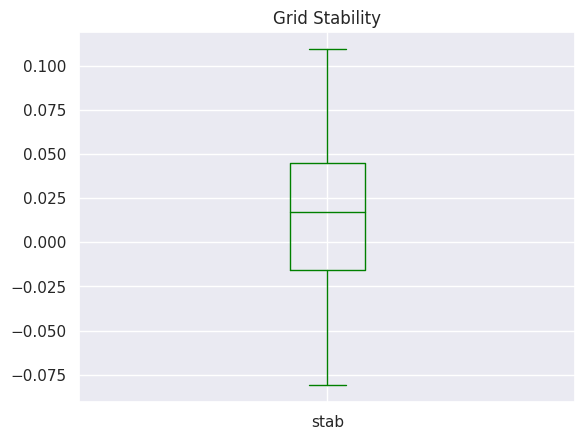

In [ ]:
smart_grid.boxplot(column="stab", color = "green")
plt.title("Grid Stability")
plt.show()

#### Visualization of column relationships (Categorical Variables)



1.   Comparing two columns using different types of plots
2.   Comparing multiple columns using different types of plots



In [ ]:
# Code Here (Add as many cells as you need)
smart_grid["stabf"].unique
smart_grid["stabf"].value_counts()

unstable    6380
stable      3620
Name: stabf, dtype: int64

<Axes: >

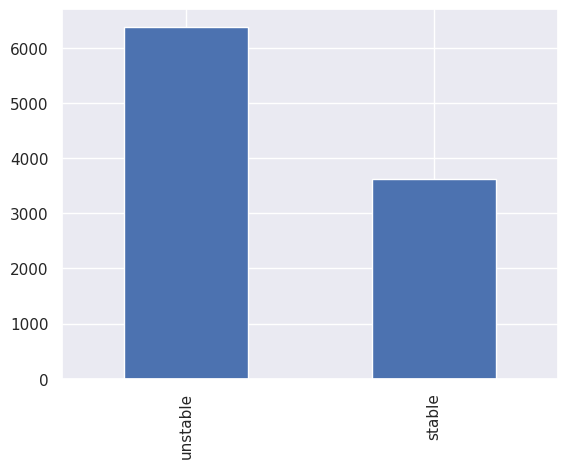

In [ ]:
smart_grid["stabf"].value_counts().plot(kind='bar')

## 3. Data Preprocessing

Explain your data preprocessing steps including filling null values, dropping duplicates, encoding, dimensionality reduction etc. whichever is applicable. Appropriate data preprocessing can hugely impact your model’s performance.

In [ ]:
#normalization data
import sklearn
from sklearn.preprocessing import StandardScaler
num_col=smart_grid.select_dtypes(include=["float64"]).columns
standard=StandardScaler()
smart_grid[num_col]=standard.fit_transform(smart_grid[num_col])

smart_grid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1.073120,unstable
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,-0.587487,stable
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,-0.332095,unstable
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,0.355922,unstable
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,0.924487,unstable


In [ ]:
#labelEncoding
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
smart_grid["stabf"]=label_encoder.fit_transform(smart_grid["stabf"])

smart_grid.head()

,tau1,tau2,tau3,tau4,p1,p2,p3,p4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.017397,1.079405,-0.017078,-1.092545,0.457467,1.220013,1.321628,1.579026,1.073120,1
1,1.478297,-0.126705,-0.803111,-1.415043,1.752124,-1.593619,-1.438158,-0.011575,-0.406791,1.230354,0.135424,0.936256,-0.587487,0
2,1.357093,1.312140,-0.803499,-1.471504,-0.458492,0.098253,-0.062840,0.760963,-1.319852,0.881299,1.146596,-1.513802,-0.332095,1
3,-1.653138,0.882289,-0.278354,-1.060901,0.284250,0.513904,-1.591046,0.583414,-0.287304,1.647250,1.474543,-0.591750,0.355922,1
4,-0.771543,0.860108,-0.111670,1.680114,-0.298075,0.287450,-1.376343,1.606636,0.992226,-0.253610,0.481133,1.079063,0.924487,1


In [ ]:
smart_grid1 = smart_grid.copy()

smart_grid1.drop(columns=["p1", "p2", "p3", "p4"],inplace=True)

smart_grid1.head()

,tau1,tau2,tau3,tau4,g1,g2,g3,g4,stab,stabf
0,-0.835374,-0.791317,1.141704,1.652103,0.457467,1.220013,1.321628,1.579026,1.073120,1
1,1.478297,-0.126705,-0.803111,-1.415043,-0.406791,1.230354,0.135424,0.936256,-0.587487,0
2,1.357093,1.312140,-0.803499,-1.471504,-1.319852,0.881299,1.146596,-1.513802,-0.332095,1
3,-1.653138,0.882289,-0.278354,-1.060901,-0.287304,1.647250,1.474543,-0.591750,0.355922,1
4,-0.771543,0.860108,-0.111670,1.680114,0.992226,-0.253610,0.481133,1.079063,0.924487,1


In [ ]:
smart_grid1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   tau1    10000 non-null  float64
 1   tau2    10000 non-null  float64
 2   tau3    10000 non-null  float64
 3   tau4    10000 non-null  float64
 4   g1      10000 non-null  float64
 5   g2      10000 non-null  float64
 6   g3      10000 non-null  float64
 7   g4      10000 non-null  float64
 8   stab    10000 non-null  float64
 9   stabf   10000 non-null  int64  
dtypes: float64(9), int64(1)
memory usage: 781.4 KB


### **Write Here**

Data preprocessing is an important step in any machine learning project, and it involves cleaning and transforming the dataset to prepare it for model training. Some data preprocessing steps for that we have used in this Titanic dataset include:

1. Normalization of the data: Normalization is a technique often applied as part of data preparation for machine learning. We use this technique to change the values of numeric columns in the dataset to use a common scale, without distorting differences in the ranges of values or losing information.

2. Encoding categorical variables: The "stabf" column has categorical variables that need to be encoded into numerical values for machine learning algorithms to use. So we encoded them by using label encoder.

3. Drop unnecessary column: We drop the colums named-p1, p2, p3, p4 because after analyzing the dataset we found out that there is no obvious relationship between power[x] columns and stability.

## 4.	Machine Learning Models



1.   Develop machine learning models.
2.   You may try changing different parameters to obtain better training
accuracy.
3. At least two models (with different parameters)



Provide a brief description of the machine learning models you used. (Provide a detailed description of their parameter)

Don’t copy-paste directly from the Internet! Write in your own words.

In [ ]:
#for best model finding we use lazypredict
! pip install lazypredict
import lazypredict
from lazypredict.Supervised import LazyClassifier
from sklearn.model_selection import train_test_split
x_df = smart_grid.drop(['stabf',"stab"] ,axis='columns')
y_df =  smart_grid[[ "stabf"]]
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=None)
clf=LazyClassifier(verbose=0,ignore_warnings=True, custom_metric=None)
models_train,predictions_train = clf.fit(X_train, X_train, y_train, y_train)
models_test,predictions_test = clf.fit(X_train, X_test, y_train, y_test)
models_train

 97%|█████████▋| 28/29 [00:33<00:01,  1.15s/it]

[LightGBM] [Info] Number of positive: 5116, number of negative: 2884
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001297 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639500 -> initscore=0.573195
[LightGBM] [Info] Start training from score 0.573195


100%|██████████| 29/29 [00:34<00:00,  1.18s/it]


'tuple' object has no attribute '__name__'
Invalid Classifier(s)


 97%|█████████▋| 28/29 [00:27<00:01,  1.05s/it]

[LightGBM] [Info] Number of positive: 5116, number of negative: 2884
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001219 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 3060
[LightGBM] [Info] Number of data points in the train set: 8000, number of used features: 12
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.639500 -> initscore=0.573195
[LightGBM] [Info] Start training from score 0.573195


100%|██████████| 29/29 [00:27<00:00,  1.06it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
XGBClassifier,1.00,1.00,1.00,1.00,2.30
DecisionTreeClassifier,1.00,1.00,1.00,1.00,0.18
RandomForestClassifier,1.00,1.00,1.00,1.00,3.63
ExtraTreeClassifier,1.00,1.00,1.00,1.00,0.05
ExtraTreesClassifier,1.00,1.00,1.00,1.00,1.06
LabelPropagation,1.00,1.00,1.00,1.00,5.19
LabelSpreading,1.00,1.00,1.00,1.00,6.99
LGBMClassifier,1.00,1.00,1.00,1.00,0.46
BaggingClassifier,0.99,1.00,1.00,0.99,0.89


In [ ]:
models_test

,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
SVC,0.96,0.96,0.96,0.96,1.90
XGBClassifier,0.95,0.95,0.95,0.95,2.32
LGBMClassifier,0.94,0.94,0.94,0.94,0.36
RandomForestClassifier,0.93,0.92,0.92,0.93,3.46
ExtraTreesClassifier,0.93,0.91,0.91,0.93,0.91
BaggingClassifier,0.90,0.90,0.90,0.90,0.86
NuSVC,0.91,0.89,0.89,0.90,4.25
QuadraticDiscriminantAnalysis,0.88,0.87,0.87,0.88,0.05
DecisionTreeClassifier,0.86,0.85,0.85,0.86,0.17


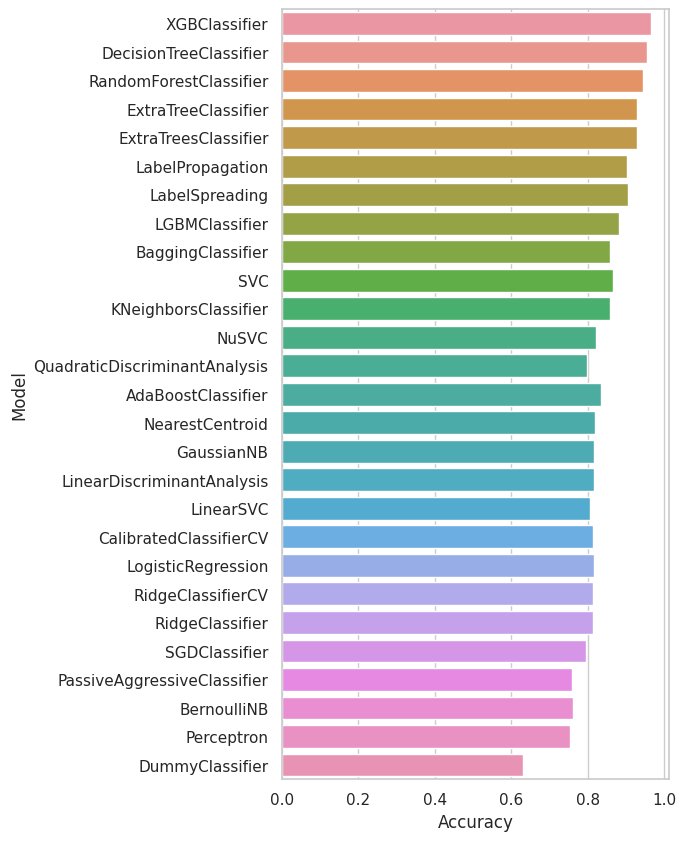

In [ ]:
#test result visulaization
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5, 10))
sns.set_theme(style="whitegrid")
ax = sns.barplot(y=models_train.index, x="Accuracy", data=models_test)

In [ ]:
# Code Here (Add as many cells as you need)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay

In [ ]:
x_df = smart_grid1.drop(['stabf',"stab"] ,axis='columns')
y_df =  smart_grid1["stabf"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=None)

#Logistic Regression
clflg1=LogisticRegression()
clflg1.fit(X_train,y_train)
prediction_test = clflg1.predict(X_test)
acc_clflg1 = sklearn.metrics.accuracy_score(y_test, prediction_test)*100
acc_clflg1

82.39999999999999

In [ ]:
cv_scores = cross_val_score(clflg1,x_df,y_df,cv=5)
np.mean(cv_scores)*100

81.52000000000001

In [ ]:
mean_absolute_error(y_test, prediction_test)

0.176

[[ 526  206]
 [ 146 1122]]


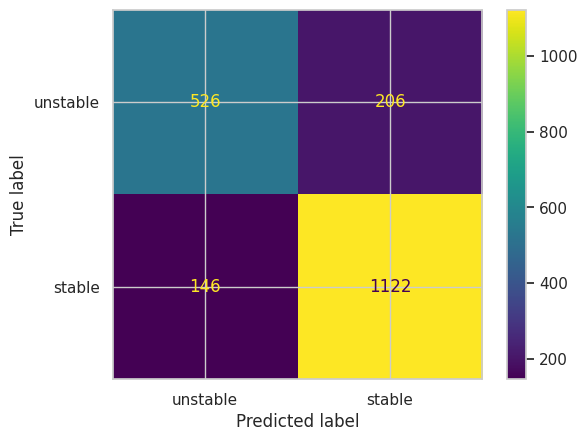

In [ ]:
cm1 =confusion_matrix(y_test, prediction_test)
print(cm1)

clflg1.classes_
disp = ConfusionMatrixDisplay(cm1,display_labels=['unstable','stable'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.78      0.72      0.75       732
           1       0.84      0.88      0.86      1268

    accuracy                           0.82      2000
   macro avg       0.81      0.80      0.81      2000
weighted avg       0.82      0.82      0.82      2000



In [ ]:
x_df = smart_grid1.drop(['stabf',"stab"] ,axis='columns')
y_df =  smart_grid1["stabf"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=None)

#Logistic Regrssion with parameter
clflg2=LogisticRegression(max_iter = 1000 , random_state= 42)
clflg2.fit(X_train,y_train)
prediction_test = clflg2.predict(X_test)
acc_clflg2 = sklearn.metrics.accuracy_score(y_test, prediction_test)*100
acc_clflg2

81.69999999999999

In [ ]:
cv_scores1 = cross_val_score(clflg2,x_df,y_df,cv=10)
np.mean(cv_scores1)*100

81.54

In [ ]:
cm2 =confusion_matrix(y_test, prediction_test)
print(cm2)

[[ 497  199]
 [ 167 1137]]


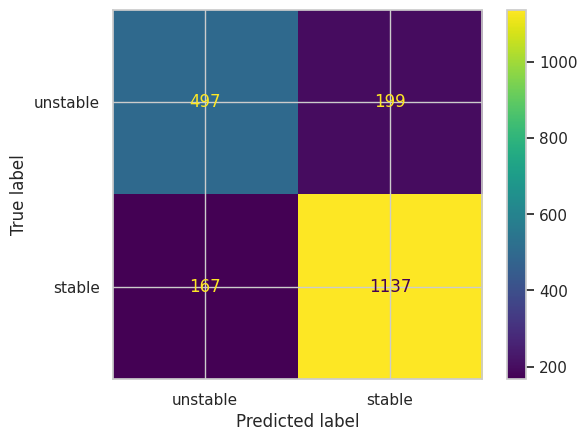

In [ ]:
clflg2.classes_
disp= ConfusionMatrixDisplay(cm2,display_labels=['unstable','stable'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.75      0.71      0.73       696
           1       0.85      0.87      0.86      1304

    accuracy                           0.82      2000
   macro avg       0.80      0.79      0.80      2000
weighted avg       0.82      0.82      0.82      2000



In [ ]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay

x_df = smart_grid1.drop(['stabf',"stab"] ,axis='columns')
y_df =  smart_grid1["stabf"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=None)

#Support Vector Classifier
clfsvm1=svm.SVC()
clfsvm1.fit(X_train,y_train)
prediction_test = clfsvm1.predict(X_test)
acc_clfsvm1 = sklearn.metrics.accuracy_score(y_test, prediction_test)*100
acc_clfsvm1

97.15

In [ ]:
mean_absolute_error(y_test, prediction_test)

0.0285

[[ 750   34]
 [  23 1193]]


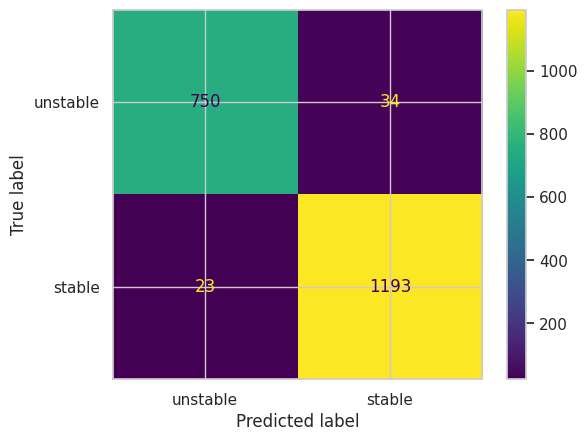

In [ ]:
cm3 =confusion_matrix(y_test, prediction_test)
print(cm3)
clfsvm1.classes_
disp= ConfusionMatrixDisplay(cm3,display_labels=['unstable','stable'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.97      0.96      0.96       784
           1       0.97      0.98      0.98      1216

    accuracy                           0.97      2000
   macro avg       0.97      0.97      0.97      2000
weighted avg       0.97      0.97      0.97      2000



In [ ]:
import sklearn
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error,confusion_matrix, ConfusionMatrixDisplay

x_df = smart_grid1.drop(['stabf',"stab"] ,axis='columns')
y_df =  smart_grid1["stabf"]

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_df, y_df, test_size=0.2, random_state=None)

#Support Vector Classifier with parameter
clfsvm2=svm.SVC(kernel='sigmoid',C=1000.0,gamma=1e-05)
clfsvm2.fit(X_train,y_train)
prediction_test = clfsvm2.predict(X_test)
acc_clfsvm2 = sklearn.metrics.accuracy_score(y_test, prediction_test)*100
acc_clfsvm2

81.25

[[ 498  192]
 [ 183 1127]]


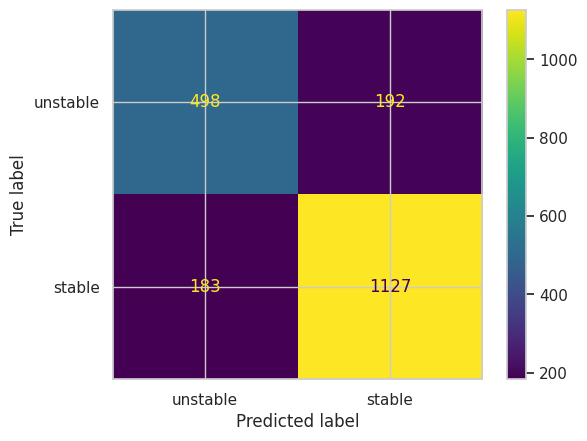

In [ ]:
cm4 =confusion_matrix(y_test, prediction_test)
print(cm4)
clfsvm2.classes_
disp = ConfusionMatrixDisplay(cm4,display_labels=['unstable','stable'])
disp.plot()

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test, prediction_test))

              precision    recall  f1-score   support

           0       0.73      0.72      0.73       690
           1       0.85      0.86      0.86      1310

    accuracy                           0.81      2000
   macro avg       0.79      0.79      0.79      2000
weighted avg       0.81      0.81      0.81      2000



### **Write Here**

We applied Logistic regression to build your ML model for this dataset. By using the default parameters for logistic regression model we get the accuracy ac = 80.7. Our score also depends on how we had split our training data using train_test_split. So we perform k-fold cross validation to get a more accurate score. The score after 5 folds is 81.52.After that we again use logistic regression with different parameters.This time we got slightly better accuracy than the privious model which is 81.15.we perform k-fold cross validation to get a more accurate score. The score after 10 folds is 81.54. Here we also used confusion matrix. Because confusion matrix presents a table layout of the different outcomes of the prediction and results of a classification problem and helps visualize its outcomes. We have also applied support vector Classifier to build the ML model. By using this model with default parameters we got the accuracy score = 96.55.We have also applied SVC with different parameter and got the accuracy score which is 80.80.

## 5.	Performance Evaluation and Discussion

Use charts and figures appropriately to visualize and compare the performance of different models. (Add as many cells as you need)

\

Analyze the performance of the models and provide your hypothesis behind their performance, e.g. Why are some models performing better than others? Provide appropriate reasoning for your hypothesis.

In [ ]:
# Code Here (Add as many cells as you need)
models = pd.DataFrame({
    'Model': ['Logistic Regression(Default)','Logistic Regression', 'Support Vector Classifier(Default)', 'Support Vector Classifier'],
    'Score': [acc_clflg1, acc_clflg2, acc_clfsvm1, acc_clfsvm2 ]})
models.sort_values(by='Score', ascending=False)

,Model,Score
2,Support Vector Classifier(Default),97.15
0,Logistic Regression(Default),82.40
1,Logistic Regression,81.70
3,Support Vector Classifier,81.25


### **Write Here**

From the above chart, we can see that Support Vector Classifier with default parameter is giving the most accurate result(96.55%) than the other models for the Electrical grid stability simulated dataset. After Support Vector Classifier logistic regression with different parameters gives the more accurate result. We also perform k-fold cross validation to get a more accurate score. But the accuracy rate is still lower than the support vector classifier. So we can say that the Support Vector Classifier is the best model for this dataset. One of the reason behind this can be that the parameters of the supoort vector classifier works best for our dataset.Another reason is that in out dataset the predictors do certainly determine thre responses, in the cases like this SVC do better. Though there is a chance of overfitting the data in this case, as the accuracy rate for the Support vector classifier with default parameter is nearly 100. So we change the parameter of the support vector Classifier model and get the accuracy rate nearly 80.